# Convolutional Neural Networks

We'll explore convolutions and implement some convolutional neural networks. 

## Convolutions in 1D

We'll start by implementing a simple 1D convolution with a _rectangular kernel_ that works as a running average.

In [ ]:
import numpy as np

input = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

kernel = np.ones(4) / 4

averaged_signal = np.convolve(input, kernel, mode="valid")

print(averaged_signal)

Try to modify the code above by changing the `signal` and the `kernel`.
For example, use the following kernels:

- _Prewitt kernel_ `[1, 0, -1]` for edge detection or differentiation (equal to the _Sobel kernel_ in 1D).

- _Gaussian kernel_ `[.25 .5 .75 .5 .25]` for smoothing.

## Convolutions in 2D

We'll now move on and implement a 2D convolution with a _rectangular kernel_ that works as a local averaging.

In [ ]:
import numpy as np
from scipy import signal

input = np.array([
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]
])

kernel = np.ones((3, 3)) / 9

output = signal.convolve2d(input, kernel, mode="full")

print(output)

Tray modifying the code above changing the `signal` and the `kernel`.
For example, use the following kernels:

- _Prewitt kernel_ to detect edges:
    ```python
    kernel = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    ```

- _Sobel kernel_ to detect edges:
    ```python
    kernel = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    ```

- _Gaussian kernel_ to smooth the image:
    ```python
    kernel = np.array([
        [.04, .08, .12, .08, .04], 
        [.08, .16, .24, .16, .08], 
        [.12, .24, .36, .24, .12], 
        [.08, .16, .24, .16, .08], 
        [.04, .08, .12, .08, .04]
    ])
    ```

## Convolutional Layers

We'll now implement a convolutional layer in PyTorch. 

### Sample Image

We start by creating a grayscale image, i.e., an image with a single color channel, stored in the `image` PyTorch array.
This array has for dimensions, corresponding to batch size (`1`), color channels (`1`), height (`H`), and width (`W`).

In [1]:
import torch

H = 12
W = 16
S = 4
image = torch.zeros(1, 1, H, W)
for idx in range(0, H, S):
    for idy in range(0, W, S):
        image[0, 0, idx:idx + S, idy:idy + S] = (-1)**(idx / S + idy / S)

We can now implement the `plot_image()` function...

```python
def plot_image(image):
    import matplotlib.pyplot as plt
    
    plt.imshow(image, cmap="gray", aspect="equal", 
               extent=[0, image.shape[1], 0, image.shape[0]])
    plt.grid(color="red", linewidth=1)
    plt.xticks(range(0, image.shape[1] + 1))
    plt.yticks(range(0, image.shape[0] + 1))
    plt.tight_layout()
    plt.show()
```

... and use it to show the image.

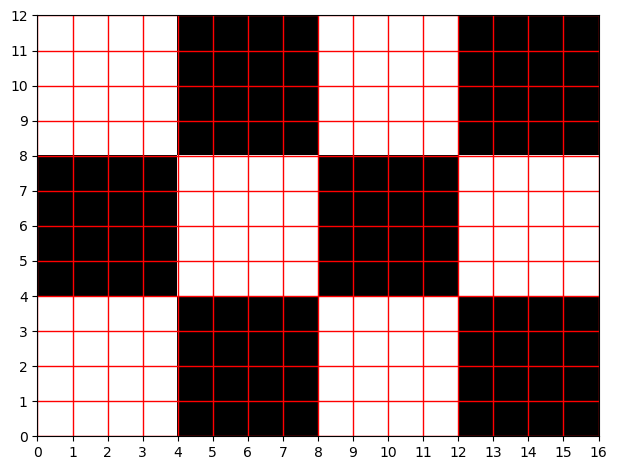

In [2]:
from plotting_cnn import plot_image

plot_image(image.squeeze())

### Convolutional Layer

We'll now implement a convolutional layer in PyTorch with one input channel (`in_channels=1`), two output channels (`out_channels=2`), and a square kernel with size $1 \times 3$ (`kernel_size=(1, 3)`).

We then initialize its weights to perform a local averaging and an horizonthal edge detection.

In [53]:
import torch
from torch.nn import Conv2d, Parameter

conv = Conv2d(in_channels=1, out_channels=2, kernel_size=(1, 3))
filters = torch.zeros(conv.out_channels, conv.in_channels, *conv.kernel_size)
filters[0, 0, :, :] = torch.Tensor([[1, 1, 1],]) / 3
filters[1, 0, :, :] = torch.Tensor([[-1, 0, 1],])
conv.weight = Parameter(filters)

features = conv(image)

We can now implement the `plot_features()` function...

```python
```

... and use it to plot the output features of the convolutional layer.

In [54]:
from plotting_cnn import plot_channels

plot_channels(features[0].detach())

ImportError: cannot import name 'plot_channels' from 'plotting_cnn' (/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/Ch03_CNN/Ex03A/plotting_cnn.py)

1

IndexError: index 2 is out of bounds for dimension 1 with size 2

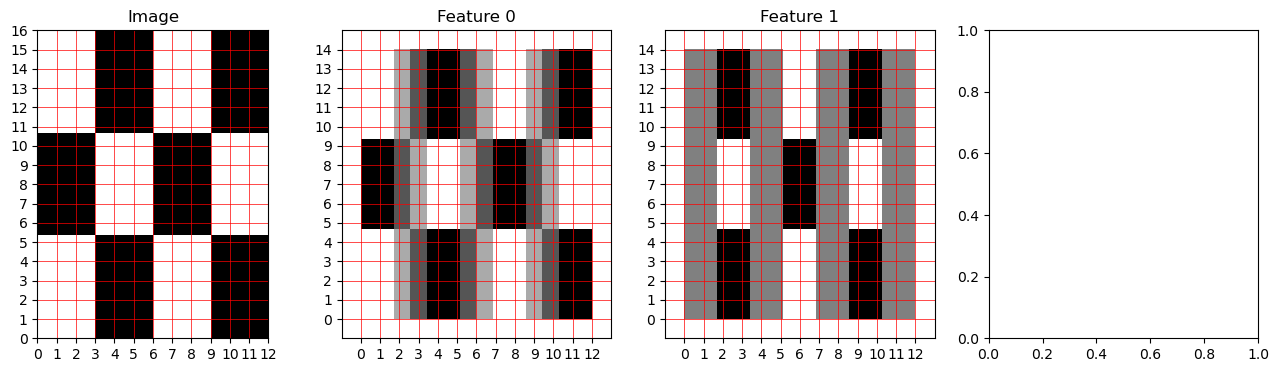

In [49]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

def plot_channel(ax, title, channel, offset=(0, 0)):
    ax.imshow(channel, cmap="gray", aspect="equal", 
               extent=[0, channel.shape[0], 0, channel.shape[1]])
    ax.grid(color="red", linewidth=.5)
    ax.set_title(title)
    ax.set_xticks(range(0, channel.shape[0] + 1))
    ax.set_xlim(- offset[0], channel.shape[0] + offset[0])
    ax.set_yticks(range(0, channel.shape[1] + 1))
    ax.set_ylim(- offset[1], channel.shape[1] + offset[1])

plot_channel(axs[0], "Image", image.squeeze())

plot_channel(axs[1], "Feature 0", features[0, 0, :, :].detach().squeeze(), (1, 1))
plot_channel(axs[2], "Feature 1", features[0, 1, :, :].detach().squeeze(), (1, 1))
plot_channel(axs[3], "Feature 2", features[0, 2, :, :].detach().squeeze(), (1, 1))

plt.tight_layout()
plt.show()

## ReLU Activation

We'll now add a ReLU activation.

To combine the convolutional layer and the relu, we need to use the `nn.Sequential` model.

In [ ]:
import torch
from torch.nn import Conv2d, Parameter

L = 16
S = 4
image = torch.zeros(1, 1, L, L)
for idx in range(0, L, S):
    for idy in range(0, L, S):
        image[0, 0, idx:idx + S, idy:idy + S] = (-1)**(idx / S + idy / S)

conv = Conv2d(in_channels=1, out_channels=3, kernel_size=3)
filters = torch.zeros(conv.out_channels, conv.in_channels, *conv.kernel_size)
filters[0, 0, :, :] = torch.Tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
filters[1, 0, :, :] = torch.Tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filters[2, 0, :, :] = torch.Tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
conv.weight = Parameter(filters)

relu = torch.nn.ReLU()

model = torch.nn.Sequential(conv, relu)

features = conv(image)

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

def plot_channel(ax, title, channel, offset=(0, 0)):
    ax.imshow(channel, cmap="gray", aspect="equal", 
               extent=[0, channel.shape[0], 0, channel.shape[1]])
    ax.grid(color="red", linewidth=.5)
    ax.set_title(title)
    ax.set_xticks(range(0, channel.shape[0] + 1))
    ax.set_xlim(- offset[0], channel.shape[0] + offset[0])
    ax.set_yticks(range(0, channel.shape[1] + 1))
    ax.set_ylim(- offset[1], channel.shape[1] + offset[1])

plot_channel(axs[0], "Image", image.squeeze())

plot_channel(axs[1], "Feature 0", features[0, 0, :, :].detach().squeeze(), (1, 1))
plot_channel(axs[2], "Feature 1", features[0, 1, :, :].detach().squeeze(), (1, 1))
plot_channel(axs[3], "Feature 2", features[0, 2, :, :].detach().squeeze(), (1, 1))

plt.tight_layout()
plt.show()

## Pooling Layers

We can then add a pooling layer at the output with a square kernel with size $2 \times 2$ (`kernel_size=2`) and stride of 2 both directions (`stride=2`).

In [ ]:
import torch
from torch.nn import Conv2d, Parameter, MaxPool2d, Sequential

L = 16
S = 4
image = torch.zeros(1, 1, L, L)
for idx in range(0, L, S):
    for idy in range(0, L, S):
        image[0, 0, idx:idx + S, idy:idy + S] = (-1)**(idx / S + idy / S)

conv = Conv2d(in_channels=1, out_channels=3, kernel_size=3)
filters = torch.zeros(conv.out_channels, conv.in_channels, *conv.kernel_size)
filters[0, 0, :, :] = torch.Tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
filters[1, 0, :, :] = torch.Tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filters[2, 0, :, :] = torch.Tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
conv.weight = Parameter(filters)

pool = MaxPool2d(kernel_size=2, stride=2)

model = Sequential(conv, pool)

features = model(image)

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

def plot_channel(ax, title, channel, offset=(0, 0)):
    ax.imshow(channel, cmap="gray", aspect="equal", 
               extent=[0, channel.shape[0], 0, channel.shape[1]])
    ax.grid(color="red", linewidth=.5)
    ax.set_title(title)
    ax.set_xticks(range(0, channel.shape[0] + 1))
    ax.set_xlim(- offset[0], channel.shape[0] + offset[0])
    ax.set_yticks(range(0, channel.shape[1] + 1))
    ax.set_ylim(- offset[1], channel.shape[1] + offset[1])

plot_channel(axs[0], "Image", image.squeeze())

plot_channel(axs[1], "Feature 0", features[0, 0, :, :].detach().squeeze())
plot_channel(axs[2], "Feature 1", features[0, 1, :, :].detach().squeeze())
plot_channel(axs[3], "Feature 2", features[0, 2, :, :].detach().squeeze())

plt.tight_layout()
plt.show()

## Upsampling Layers

We'll now add an upsampling layer with a scale factor of 3 (`scale_factor=3`).

In [ ]:
import torch
from torch.nn import Conv2d, Parameter, MaxPool2d, Sequential, Upsample

L = 16
S = 4
image = torch.zeros(1, 1, L, L)
for idx in range(0, L, S):
    for idy in range(0, L, S):
        image[0, 0, idx:idx + S, idy:idy + S] = (-1)**(idx / S + idy / S)

conv = Conv2d(in_channels=1, out_channels=3, kernel_size=3)
filters = torch.zeros(conv.out_channels, conv.in_channels, *conv.kernel_size)
filters[0, 0, :, :] = torch.Tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
filters[1, 0, :, :] = torch.Tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filters[2, 0, :, :] = torch.Tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
conv.weight = Parameter(filters)

pool = MaxPool2d(kernel_size=2, stride=2)

upsample = Upsample(scale_factor=3)

model = Sequential(conv, pool, upsample)

features = model(image)

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

def plot_channel(ax, title, channel, offset=(0, 0)):
    ax.imshow(channel, cmap="gray", aspect="equal", 
               extent=[0, channel.shape[0], 0, channel.shape[1]])
    ax.grid(color="red", linewidth=.5)
    ax.set_title(title)
    ax.set_xticks(range(0, channel.shape[0] + 1))
    ax.set_xlim(- offset[0], channel.shape[0] + offset[0])
    ax.set_yticks(range(0, channel.shape[1] + 1))
    ax.set_ylim(- offset[1], channel.shape[1] + offset[1])

plot_channel(axs[0], "Image", image.squeeze())

plot_channel(axs[1], "Feature 0", features[0, 0, :, :].detach().squeeze())
plot_channel(axs[2], "Feature 1", features[0, 1, :, :].detach().squeeze())
plot_channel(axs[3], "Feature 2", features[0, 2, :, :].detach().squeeze())

plt.tight_layout()
plt.show()